<a href="https://colab.research.google.com/github/aozdl/NLP-Project/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import joblib

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Import Dataset

In [2]:
url_data = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"

df = pd.read_csv(url_data)

df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [3]:
# Remove duplicates and reset index
df = df.drop_duplicates().reset_index(drop=True)

In [4]:
df["is_spam"] = df["is_spam"].apply(lambda x: 1 if x else 0)

df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [5]:
# Preprocess URLs (tokenize, remove stopwords, lemmatize)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [6]:
print(f"Spam: {len(df.loc[df.is_spam == 1])}")
print(f"No spam: {len(df.loc[df.is_spam == 0])}")

Spam: 244
No spam: 2125


In [7]:
def preprocess_text(text):
    # Remove characters that are not letters or spaces
    text = re.sub(r'[^a-z ]', " ", text.lower())

    # Remove single characters and extra spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\s+', " ", text)

    return text.split()

def lemmatize_text(words):
    tokens = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]  # Remove short words
    return tokens

df["url"] = df["url"].apply(preprocess_text)
df["url"] = df["url"].apply(lemmatize_text)

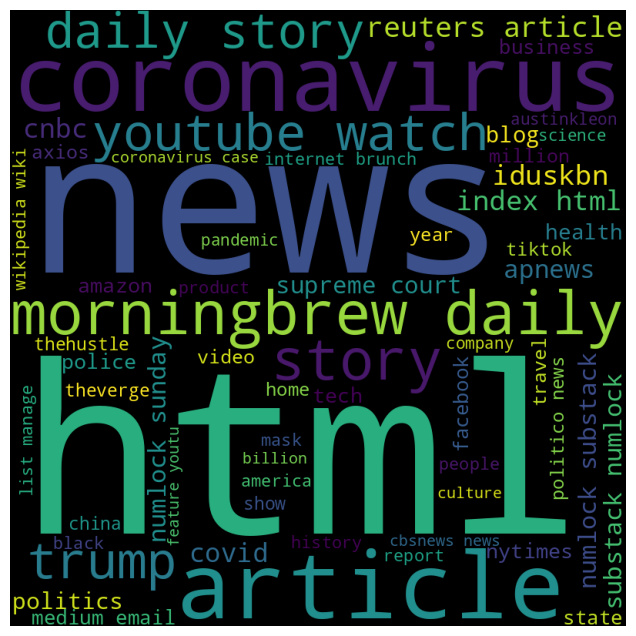

In [8]:
# WordCloud for visualization
wordcloud = WordCloud(width=800, height=800, background_color="black", max_words=1000, min_font_size=20).generate(" ".join([" ".join(url) for url in df["url"]]))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
# Join tokenized URLs for vectorization
tokens_list = df["url"].apply(lambda x: " ".join(x))

In [10]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = df["is_spam"]

# Train Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [14]:
accuracy_score(y_test, y_pred)

0.9514767932489452

# GridSearchCV

In [16]:
# hyperparameter Optimization
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']})

In [17]:
# Optimized model results
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized)}")
print(f"Optimized Confusion Matrix:\n{confusion_matrix(y_test, y_pred_optimized)}")

Optimized Accuracy: 0.9578059071729957
Optimized Confusion Matrix:
[[427   8]
 [ 12  27]]


#Save Model

In [18]:
joblib.dump(best_model, "svm_spam_classifier.pkl")

['svm_spam_classifier.pkl']